In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# إعداد البيانات
%matplotlib inline

In [2]:
# Load my dataset using pandas Dataframe
data = pd.read_csv("D:/diploma AI/advanced_machine_learning_course_Amit/matriales/Final_project_Data_science/session/fordgobike-tripdataFor201902.csv")
data.head()           
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183416 entries, 0 to 183415
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183416 non-null  int64  
 1   start_time               183416 non-null  object 
 2   end_time                 183416 non-null  object 
 3   start_station_id         183219 non-null  float64
 4   start_station_name       183219 non-null  object 
 5   start_station_latitude   183416 non-null  float64
 6   start_station_longitude  183416 non-null  float64
 7   end_station_id           183219 non-null  float64
 8   end_station_name         183219 non-null  object 
 9   end_station_latitude     183416 non-null  float64
 10  end_station_longitude    183416 non-null  float64
 11  bike_id                  183416 non-null  int64  
 12  user_type                183416 non-null  object 
 13  member_birth_year        175151 non-null  float64
 14  memb

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183416.000000,183219.000000,183416.000000,183416.000000,183219.000000,183416.000000,183416.000000,183416.000000,175151.000000
mean,726.067311,138.590365,37.771221,-122.352661,136.249401,37.771425,-122.352247,4472.890260,1984.806504
std,1794.371831,111.778938,0.099586,0.117100,111.514916,0.099494,0.116677,1664.386068,10.116589
min,61.000000,3.000000,37.317298,-122.453705,3.000000,37.317298,-122.453705,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [3]:
data = data.drop(['start_time', 'end_time'], axis=1, errors='ignore')

null = data.isnull().sum()
ratio = null / data.shape[0]
pd.DataFrame({"Null_sum": null , "Ratio": ratio}).T


,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
Null_sum,0.0,197.000000,197.000000,0.0,0.0,197.000000,197.000000,0.0,0.0,0.0,0.0,8265.000000,8265.000000,0.0
Ratio,0.0,0.001074,0.001074,0.0,0.0,0.001074,0.001074,0.0,0.0,0.0,0.0,0.045061,0.045061,0.0


In [4]:
cat_cols = ['start_station_name','end_station_name','user_type','member_gender','bike_share_for_all_trip']
data[cat_cols] = data[cat_cols].astype('category')
dtypes = data.dtypes
n_uniq = data.nunique()
pd.DataFrame({"Dtypes":dtypes, "Num_uniqe": n_uniq}).T


,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
Dtypes,int64,float64,category,float64,float64,float64,category,float64,float64,int64,category,float64,category,category
Num_uniqe,4752,329,329,334,335,329,329,335,335,4646,2,75,3,2


In [5]:
data.head(15)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [6]:
col_describ = ["duration_sec","start_station_id","start_station_latitude","start_station_longitude","end_station_id","end_station_latitude","end_station_longitude","bike_id","member_birth_year"]
statistics = data[col_describ].describe().T

print(statistics)

                            count         mean          std          min  \
duration_sec             183416.0   726.067311  1794.371831    61.000000   
start_station_id         183219.0   138.590365   111.778938     3.000000   
start_station_latitude   183416.0    37.771221     0.099586    37.317298   
start_station_longitude  183416.0  -122.352661     0.117100  -122.453705   
end_station_id           183219.0   136.249401   111.514916     3.000000   
end_station_latitude     183416.0    37.771425     0.099494    37.317298   
end_station_longitude    183416.0  -122.352247     0.116677  -122.453705   
bike_id                  183416.0  4472.890260  1664.386068    11.000000   
member_birth_year        175151.0  1984.806504    10.116589  1878.000000   

                                 25%          50%          75%           max  
duration_sec              325.000000   514.000000   796.000000  85444.000000  
start_station_id           47.000000   104.000000   239.000000    398.000000  
st

In [7]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_summary = pd.DataFrame({
    "Missing Count": missing_values,
    "Missing Percentage (%)": missing_percentage
}).sort_values(by="Missing Count", ascending=False).round(2)
print(missing_summary)


                         Missing Count  Missing Percentage (%)
member_birth_year                 8265                    4.51
member_gender                     8265                    4.51
end_station_id                     197                    0.11
end_station_name                   197                    0.11
start_station_id                   197                    0.11
start_station_name                 197                    0.11
start_station_longitude              0                    0.00
start_station_latitude               0                    0.00
duration_sec                         0                    0.00
end_station_latitude                 0                    0.00
bike_id                              0                    0.00
end_station_longitude                0                    0.00
user_type                            0                    0.00
bike_share_for_all_trip              0                    0.00


In [8]:
columns_to_fill = ["member_birth_year", "start_station_id", "end_station_id"]
data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].mean())


In [9]:
null = data.isnull().sum()
ratio = null / data.shape[0]
pd.DataFrame({"Null_sum": null , "Ratio": ratio}).T

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
Null_sum,0.0,0.0,197.000000,0.0,0.0,0.0,197.000000,0.0,0.0,0.0,0.0,0.0,8265.000000,0.0
Ratio,0.0,0.0,0.001074,0.0,0.0,0.0,0.001074,0.0,0.0,0.0,0.0,0.0,0.045061,0.0


In [10]:

data['start_station_name'] = data['start_station_name'].fillna(data['start_station_name'].mode()[0])
data['end_station_name'] = data['end_station_name'].fillna(data['end_station_name'].mode()[0])
data['member_gender'] = data['member_gender'].fillna(data['member_gender'].mode()[0])
data.isnull().sum().T


duration_sec               0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
data_no_duplicates = data.drop_duplicates()
print(data_no_duplicates)


        duration_sec  start_station_id  \
0              52185              21.0   
1              42521              23.0   
2              61854              86.0   
3              36490             375.0   
4               1585               7.0   
...              ...               ...   
183407           480              27.0   
183408           313              21.0   
183409           141             278.0   
183410           139             220.0   
183411           271              24.0   

                                      start_station_name  \
0       Montgomery St BART Station (Market St at 2nd St)   
1                          The Embarcadero at Steuart St   
2                                Market St at Dolores St   
3                                Grove St at Masonic Ave   
4                                    Frank H Ogawa Plaza   
...                                                  ...   
183407                           Beale St at Harrison St   
183408  Montgom

In [12]:
print(data.dtypes)  # To check the data types
print(data['user_type'].unique()) 
print(data['member_gender'].unique())  

duration_sec                  int64
start_station_id            float64
start_station_name         category
start_station_latitude      float64
start_station_longitude     float64
end_station_id              float64
end_station_name           category
end_station_latitude        float64
end_station_longitude       float64
bike_id                       int64
user_type                  category
member_birth_year           float64
member_gender              category
bike_share_for_all_trip    category
dtype: object
['Customer', 'Subscriber']
Categories (2, object): ['Customer', 'Subscriber']
['Male', 'Other', 'Female']
Categories (3, object): ['Female', 'Male', 'Other']


In [13]:

# Current year
current_year = 2024
data['member_birth_year'] = pd.to_numeric(data['member_birth_year'], errors='coerce')  
data = data[(data['member_birth_year'] >= 1900) & (data['member_birth_year'] <= current_year)]
data['age'] = current_year - data['member_birth_year']


print(data)


        duration_sec  start_station_id  \
0              52185              21.0   
1              42521              23.0   
2              61854              86.0   
3              36490             375.0   
4               1585               7.0   
...              ...               ...   
183411           271              24.0   
183412           313              21.0   
183413           141             278.0   
183414           139             220.0   
183415           271              24.0   

                                      start_station_name  \
0       Montgomery St BART Station (Market St at 2nd St)   
1                          The Embarcadero at Steuart St   
2                                Market St at Dolores St   
3                                Grove St at Masonic Ave   
4                                    Frank H Ogawa Plaza   
...                                                  ...   
183411                             Spear St at Folsom St   
183412  Montgom

In [14]:
data = data.drop(['member_birth_year'], axis=1, errors='ignore')

data.head()
data['age'] = data['age'].astype('float64')  
print(data['age'].dtype)
data.isnull().sum().T


float64


duration_sec               0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_gender              0
bike_share_for_all_trip    0
age                        0
dtype: int64

In [15]:
def average_age(data):
    # Remove NaN values and calculate the mean of the 'age' column
    avg_age = data['age'].dropna().mean()
    return avg_age

# Call the function
avg = average_age(data)
print(avg)

39.19291357629162


In [16]:
data['age'] = data['age'].fillna(avg)

data['age'] = data['age'].astype(int)


In [17]:
data['duration_min'] = data['duration_sec'] / 60


In [18]:
data['duration_hours'] = data['duration_sec'] / 60


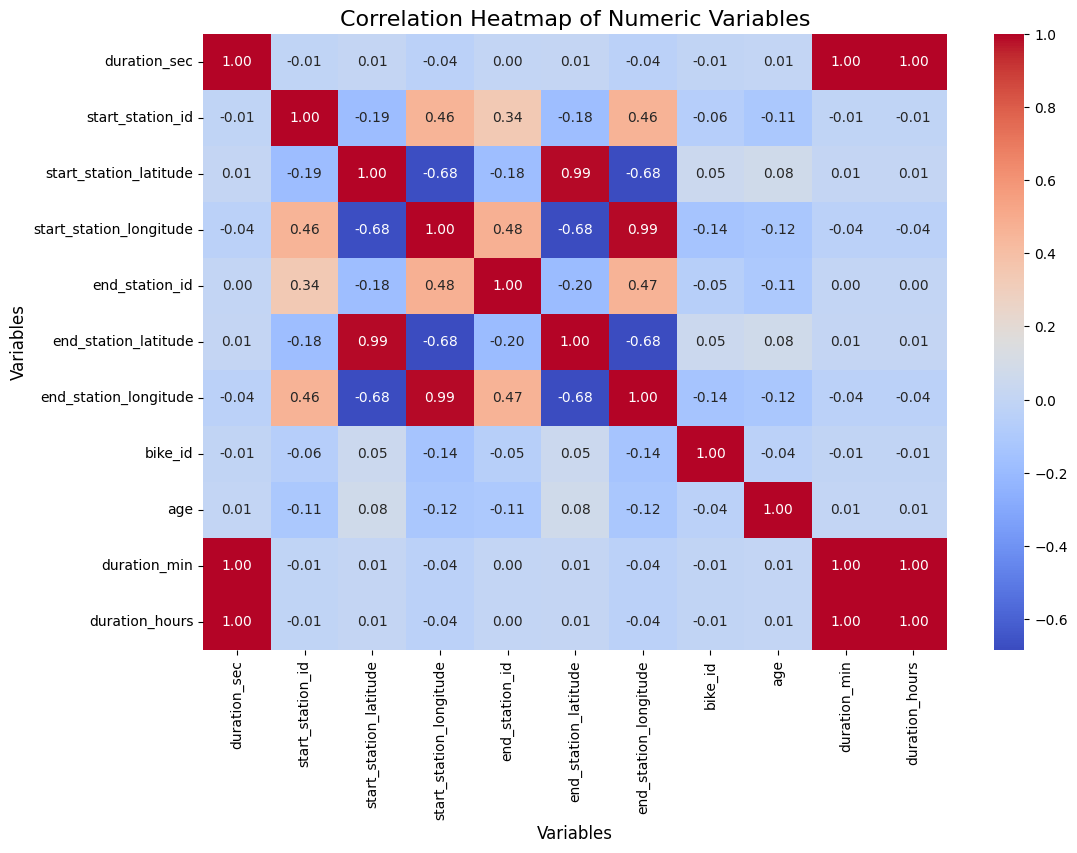

In [19]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add titles and labels
plt.title("Correlation Heatmap of Numeric Variables", fontsize=16)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)

# Display the plot
plt.show()


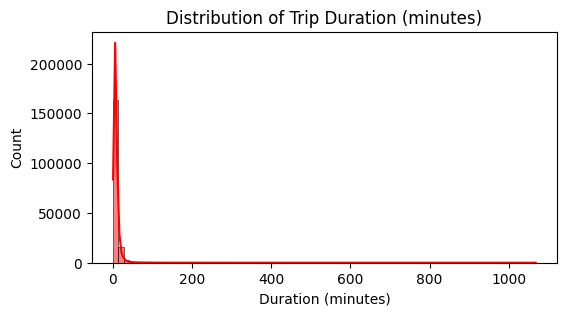

In [20]:
# histplot
data['duration_min'] = data['duration_sec'] / 80
plt.figure(figsize=(6, 3))
sns.histplot(data['duration_min'], bins=80, kde=True, color='red')
plt.title('Distribution of Trip Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

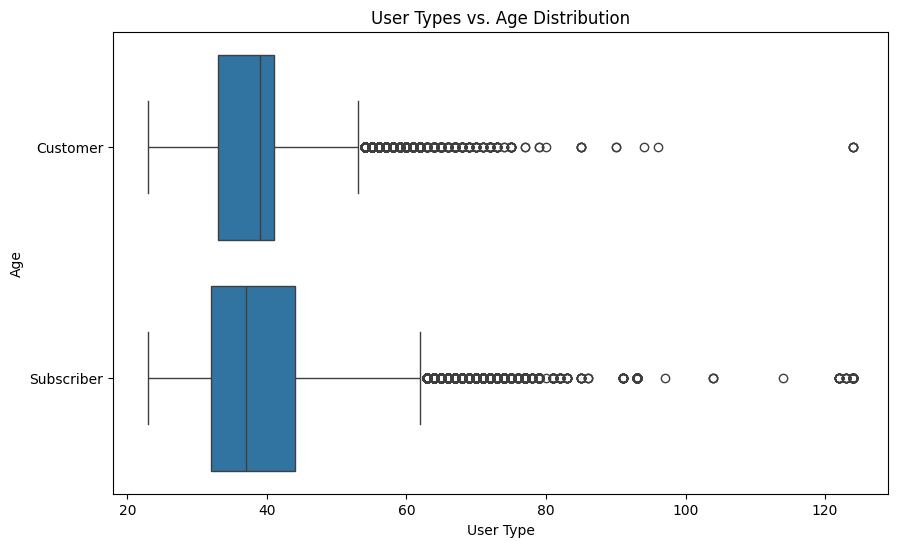

In [21]:
#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='user_type', x='age')
plt.title('User Types vs. Age Distribution')
plt.xlabel('User Type')
plt.ylabel('Age')
plt.show()

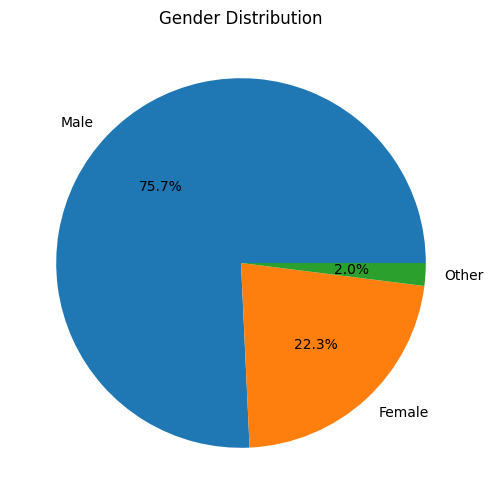

In [22]:
#pie
plt.figure(figsize=(10, 6))
gender_counts = data['member_gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

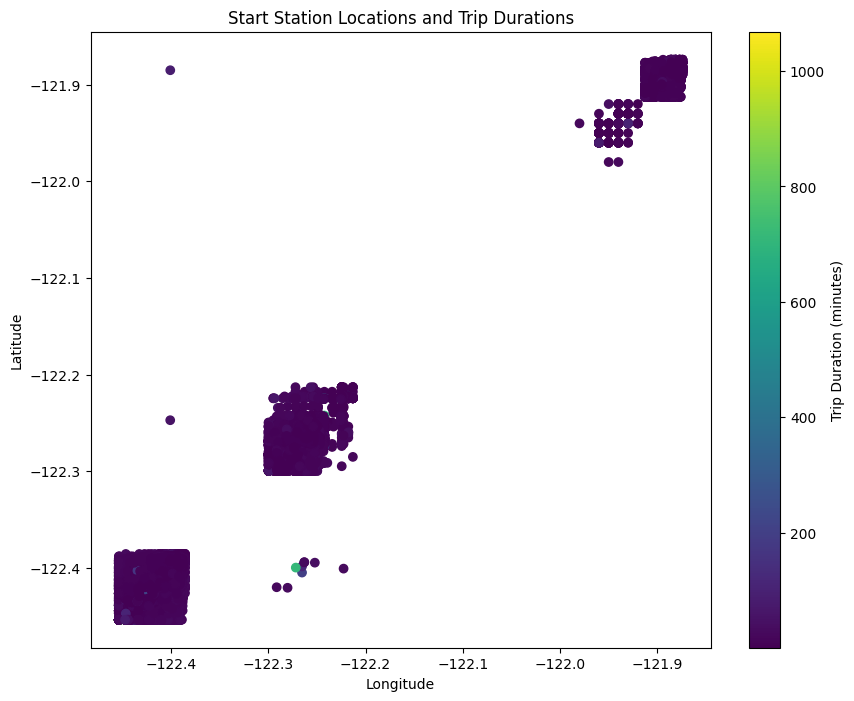

In [23]:
#scatter 
plt.figure(figsize=(10, 8))
plt.scatter(data['start_station_longitude'], data['end_station_longitude'], c=data['duration_min'], cmap='viridis')
plt.colorbar(label='Trip Duration (minutes)')
plt.title('Start Station Locations and Trip Durations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 300x300 with 0 Axes>

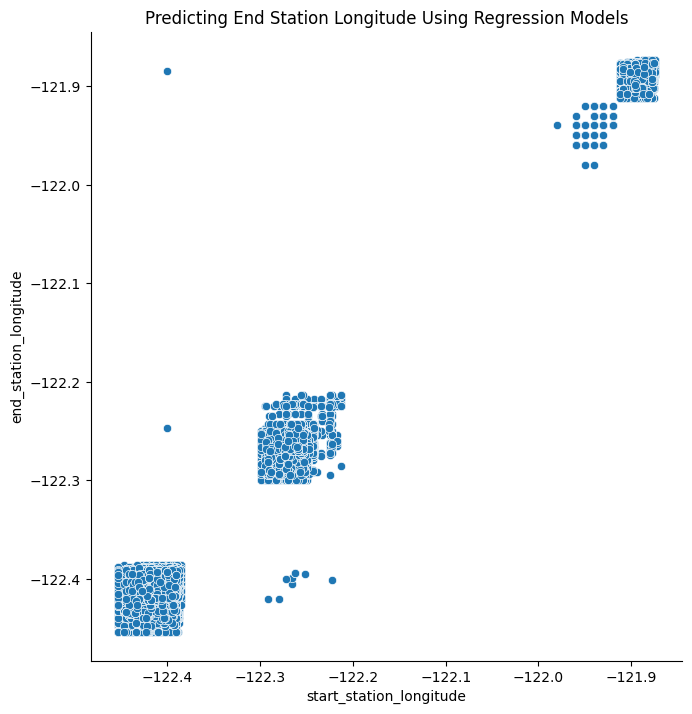

In [24]:
plt.figure(figsize=(3,3))
sns.pairplot(data,x_vars=["start_station_longitude"],y_vars=["end_station_longitude"],size=7,kind="scatter")
plt.xlabel("start_station_longitude")
plt.ylabel("end_station_longitude")
plt.title("Predicting End Station Longitude Using Regression Models")
plt.show()

In [25]:
x = data["start_station_longitude"]
y =data["end_station_longitude"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=10)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

# إنشاء مميزات متعددة الحدود
poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(x_train)


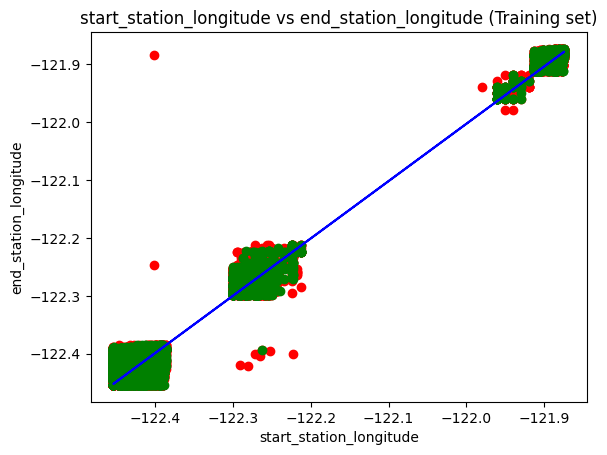

0.9851010572534751

In [26]:
x = data["start_station_longitude"]
y =data["end_station_longitude"]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=10)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
my_model = LinearRegression()
my_model.fit(x_train,y_train)
plt.scatter(x_train, y_train, color = 'red')
plt.scatter(x_test, y_test, color='green', label='Test data')
plt.plot(x_train, my_model.predict(x_train), color = 'blue')
plt.title('start_station_longitude vs end_station_longitude (Training set)')
plt.xlabel('start_station_longitude')
plt.ylabel('end_station_longitude')
plt.show()
my_model.score(x_test, y_test)


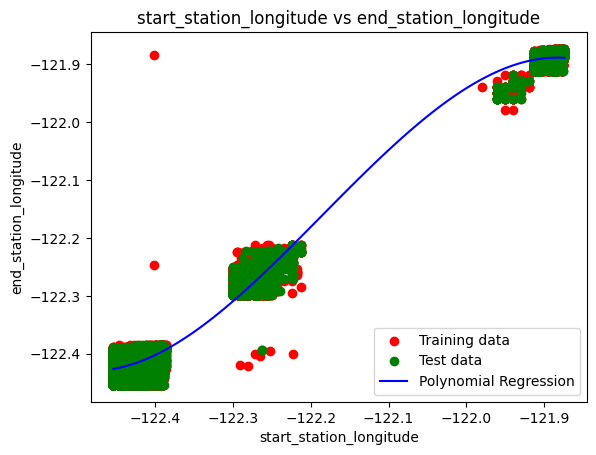

In [27]:
poly = PolynomialFeatures(degree = 15)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_poly_train , y_train)
y_poly_perd_train = poly_model.predict(x_poly_train)
y_poly_perd_test = poly_model.predict(x_poly_test)
x_range = np.linspace(x.min(),x.max(), 100).reshape(-1,1)
x_range_poly = poly.transform(x_range)
y_range_pred = poly_model.predict(x_range_poly)
plt.scatter(x_train, y_train, color='red', label='Training data')
plt.scatter(x_test, y_test, color='green', label='Test data')
plt.plot(x_range, y_range_pred, color='blue', label='Polynomial Regression')
plt.title('start_station_longitude vs end_station_longitude')
plt.xlabel('start_station_longitude')
plt.ylabel('end_station_longitude')
plt.legend()
plt.show()

In [28]:
train_predictions = my_model.predict(x_train)
test_predictions = my_model.predict(x_test)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Training R^2 score: {train_r2}")
print(f"Test R^2 score: {test_r2}")


Training R^2 score: 0.9848225698580776
Test R^2 score: 0.9851010572534751


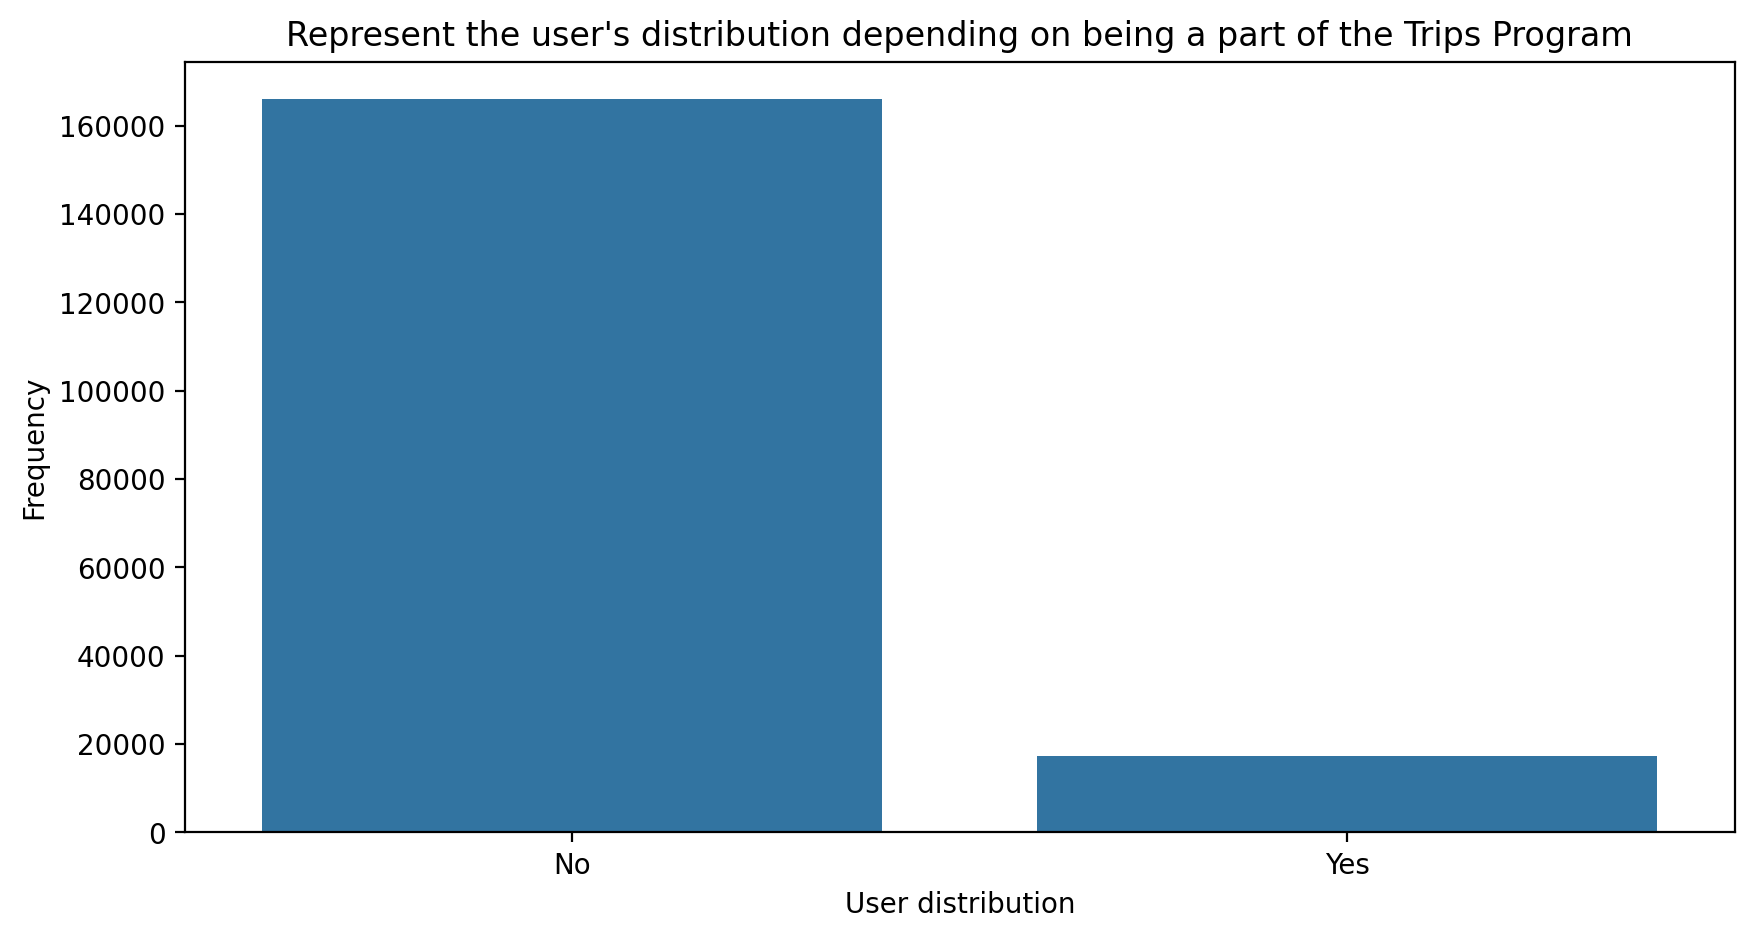

In [29]:
## I will import seaborn library to support me in making visualizations 

plt.figure(figsize = (10,5), dpi = 200)

plot = sns.countplot(data, x='bike_share_for_all_trip')

plt.xlabel('User distribution')
plt.ylabel('Frequency')
plt.title("Represent the user's distribution depending on being a part of the Trips Program")

plt.show()

In [30]:
features = ['start_station_longitude']
target = 'end_station_longitude'

X = data[features]
y = data[target]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

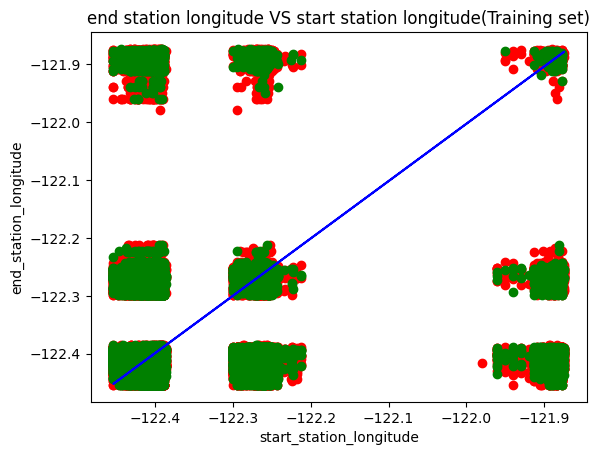

-0.956029947414677

In [34]:

plt.scatter(x_train, y_train, color = 'red')
plt.scatter(x_test, y_test, color='green', label='Test data')
plt.plot(x_train, my_model.predict(x_train), color = 'blue')
plt.title('end station longitude VS start station longitude(Training set)')
plt.xlabel('start_station_longitude')
plt.ylabel('end_station_longitude')
plt.show()
my_model.score(x_test, y_test)


In [35]:
print('Intercept of the model:',my_model.intercept_)
print('Coefficient of the line:',my_model.coef_)

Intercept of the model: -1.3815090168657065
Coefficient of the line: [0.98870544]


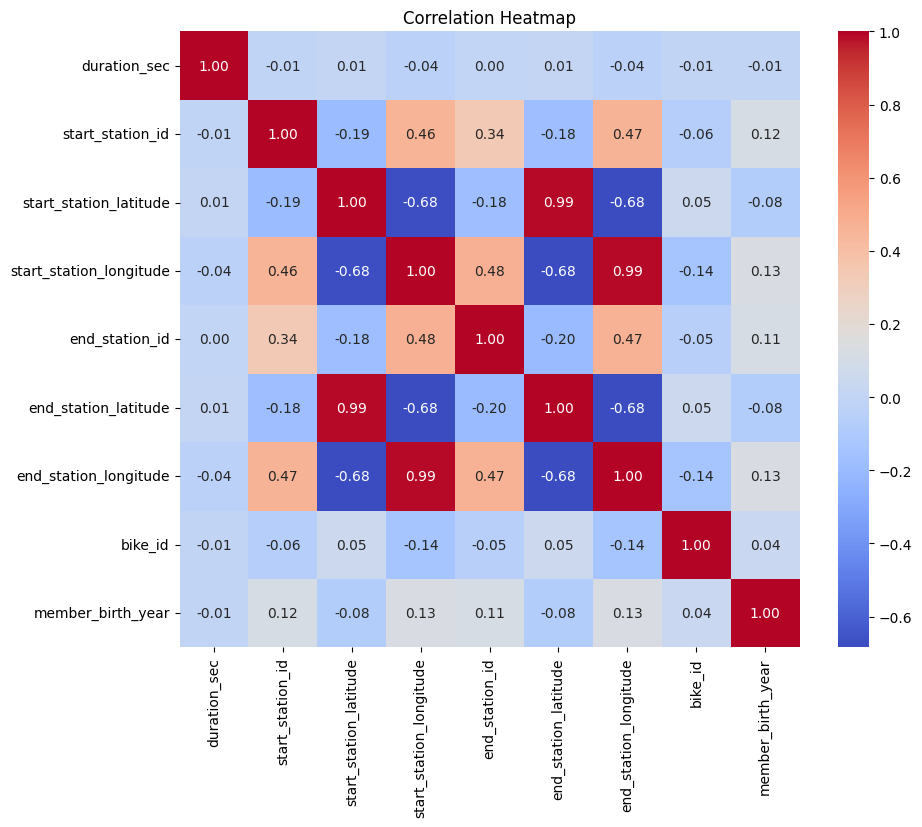

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22036\453113964.py", line 106, in generate_scatter
    plt.scatter(data[x_col], data[y_col], alpha=0.5, color="blue")
  File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\pyplot.py", line 3903, in scatter
    __ret = gca().scatter(
            ^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\__init__.py", line 1473, in inner
    return func(
           ^^^^^
  File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3

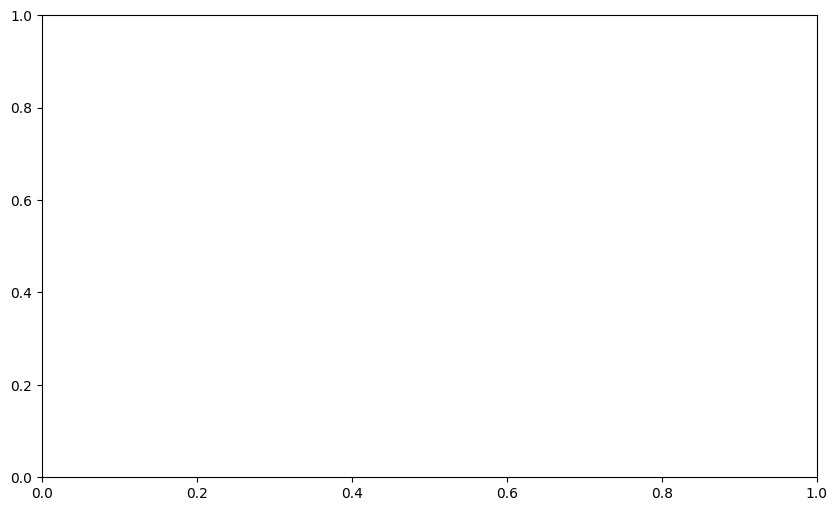

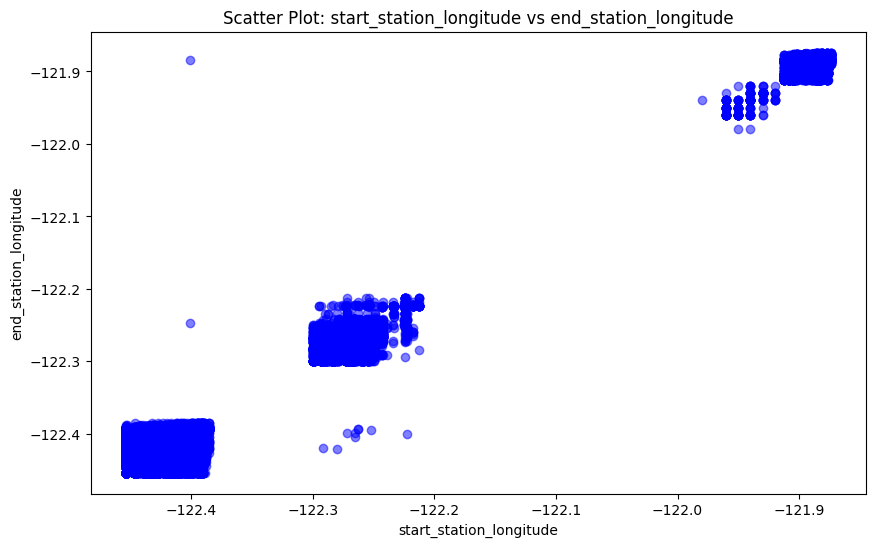

In [1]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Initialize Tkinter window
root = tk.Tk()
root.title("Data Science Final Project GUI")
root.geometry("800x600")

# Global variable to hold dataset
data = None

def load_file():
    """Load a CSV file."""
    global data
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    if not file_path:
        return
    
    try:
        data = pd.read_csv(file_path)
        messagebox.showinfo("File Loaded", f"File loaded successfully: {file_path}")
        display_preview()
    except Exception as e:
        messagebox.showerror("Error", f"Could not load file: {e}")

def display_preview():
    """Display a preview of the dataset."""
    if data is None:
        messagebox.showwarning("No Data", "Please load a dataset first.")
        return
    
    preview_window = tk.Toplevel(root)
    preview_window.title("Dataset Preview")
    
    text_widget = tk.Text(preview_window, wrap="none", height=20, width=80)
    text_widget.pack(expand=True, fill="both")
    text_widget.insert("1.0", data.head().to_string())
    text_widget.configure(state="disabled")

def show_summary():
    """Show summary statistics of the dataset."""
    if data is None:
        messagebox.showwarning("No Data", "Please load a dataset first.")
        return
    
    summary_window = tk.Toplevel(root)
    summary_window.title("Dataset Summary")
    
    text_widget = tk.Text(summary_window, wrap="none", height=20, width=80)
    text_widget.pack(expand=True, fill="both")
    text_widget.insert("1.0", data.describe().to_string())
    text_widget.configure(state="disabled")

def plot_heatmap():
    """Plot a heatmap of the correlation matrix."""
    if data is None:
        messagebox.showwarning("No Data", "Please load a dataset first.")
        return
    
    numeric_data = data.select_dtypes(include=["number"])
    if numeric_data.empty:
        messagebox.showerror("Error", "No numeric columns found for correlation.")
        return
    
    correlation_matrix = numeric_data.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

def scatter_plot():
    """Plot a scatter plot based on user input."""
    if data is None:
        messagebox.showwarning("No Data", "Please load a dataset first.")
        return
    
    scatter_window = tk.Toplevel(root)
    scatter_window.title("Scatter Plot")
    
    # Dropdown menus for selecting columns
    col1_label = tk.Label(scatter_window, text="Select X-axis:")
    col1_label.pack()
    x_col_var = tk.StringVar(scatter_window)
    x_col_menu = tk.OptionMenu(scatter_window, x_col_var, *data.columns)
    x_col_menu.pack()
    
    col2_label = tk.Label(scatter_window, text="Select Y-axis:")
    col2_label.pack()
    y_col_var = tk.StringVar(scatter_window)
    y_col_menu = tk.OptionMenu(scatter_window, y_col_var, *data.columns)
    y_col_menu.pack()
    
    def generate_scatter():
        x_col = x_col_var.get()
        y_col = y_col_var.get()
        if not x_col or not y_col:
            messagebox.showwarning("Error", "Please select both X and Y columns.")
            return
        
        plt.figure(figsize=(10, 6))
        plt.scatter(data[x_col], data[y_col], alpha=0.5, color="blue")
        plt.title(f"Scatter Plot: {x_col} vs {y_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()
    
    generate_button = tk.Button(scatter_window, text="Generate Plot", command=generate_scatter)
    generate_button.pack()

# Buttons
load_button = tk.Button(root, text="Load CSV File", command=load_file)
load_button.pack(pady=10)

preview_button = tk.Button(root, text="Preview Dataset", command=display_preview)
preview_button.pack(pady=10)

summary_button = tk.Button(root, text="Show Summary", command=show_summary)
summary_button.pack(pady=10)

heatmap_button = tk.Button(root, text="Plot Heatmap", command=plot_heatmap)
heatmap_button.pack(pady=10)

scatter_button = tk.Button(root, text="Scatter Plot", command=scatter_plot)
scatter_button.pack(pady=10)

# Add an Exit Button
exit_button = tk.Button(root, text="Exit", command=root.quit)
exit_button.pack(pady=10)

# Run Tkinter main loop
root.mainloop()
